# Online store customer data
### Yuval Bar Brunshtein  -   Osher Dighorkar  -   Rahamaim Ben Talker  -   Daniel Sara Hagai
#### 24 (Group number)
#### Link: https://www.kaggle.com/datasets/mountboy/online-store-customer-data



************

<div>
<img src="https://raw.githubusercontent.com/RBTA123/first.r/main/WhatsApp%20Image%202022-05-17%20at%2019.30.28.jpeg" width="500"/>
</div>

*************

## מבוא:
####  פרויקט זה נכתב מקובץ נתונים המצביע על קניות ברשת בין השנים 2019 - 2021 
####  בארצות הברית 
#### בפרויקט זה אנו נראה תובנות מעניינות שנובעות מנתונים אלה שאולי אפילו יפתיעו אתכם. 
#### לאחר שחקרנו את קובץ נתונים זה רצינו לראות מה המצב בארץ 
#### ולכן ערכנו סקר כדי לגלות זאת.
#### אז בואו נתחיל

In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.display import HTML

In [74]:
online_store_customer = 'https://raw.githubusercontent.com/RBTA123/first.r/main/online_store_customer_data.csv'
data_online = pd.read_csv(online_store_customer)
data_online.shape

(2512, 11)

**מטרה ראשונה לצפות האם יש מידע חסר שנוכל לתקן**

In [75]:
data_online.isnull().sum()

Transaction_date      0
Transaction_ID        0
Gender               28
Age                  42
Marital_status        0
State_names           0
Segment               0
Employees_status     26
Payment_method        0
Referal             155
Amount_spent        242
dtype: int64

**בנוסף, נתרגם את העמודה שמייצגת את זמן העסקה, לזמן שאפשר להתעסק איתו**

In [76]:
data_online['Transaction_date'] = pd.to_datetime(data_online['Transaction_date'])
data_online['Transaction_date']

0      2019-01-01
1      2019-01-01
2      2019-01-01
3      2019-01-01
4      2019-01-01
          ...    
2507   2021-05-01
2508   2021-05-01
2509   2021-05-01
2510   2021-05-01
2511   2021-05-01
Name: Transaction_date, Length: 2512, dtype: datetime64[ns]

**על מנת שלא לפגום במידע המיקורי יצרנו העתק שבו נערוך את השינויים**

In [77]:
my_deep_copy= data_online.copy()
my_deep_copy

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,2019-01-01,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,2019-01-01,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,2019-01-01,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
3,2019-01-01,151203,NaN,18.0,Single,Virginia,Platinum,workers,Card,1.0,1199.79
4,2019-01-01,151204,Male,27.0,Single,Connecticut,Basic,self-employed,Card,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2507,2021-05-01,153695,Female,57.0,Single,South Carolina,Platinum,self-employed,Card,0.0,150.10
2508,2021-05-01,153696,Female,36.0,Married,Hawaii,Silver,self-employed,PayPal,1.0,708.88
2509,2021-05-01,153697,Male,22.0,Single,South Carolina,Basic,workers,PayPal,1.0,2030.07
2510,2021-05-01,153698,NaN,44.0,Single,New York,Basic,Employees,PayPal,0.0,1909.77


**הערכים של מגדר, סכום הוצאה, גיל, קישור, ומצב סטטוס שלא ניתן להעריך בהם כיצד לתקן נמחקו**

In [78]:
my_deep_copy_1=my_deep_copy.dropna(subset = ['Gender','Amount_spent','Age','Employees_status','Referal'] )
my_deep_copy_1

,Transaction_date,Transaction_ID,Gender,Age,Marital_status,State_names,Segment,Employees_status,Payment_method,Referal,Amount_spent
0,2019-01-01,151200,Female,19.0,Single,Kansas,Basic,Unemployment,Other,1.0,2051.36
1,2019-01-01,151201,Male,49.0,Single,Illinois,Basic,self-employed,Card,0.0,544.04
2,2019-01-01,151202,Male,63.0,Married,New Mexico,Basic,workers,PayPal,1.0,1572.60
5,2019-01-03,151205,Male,71.0,Single,Hawaii,Basic,Employees,PayPal,1.0,2922.66
6,2019-01-03,151206,Female,34.0,Married,New Mexico,Platinum,Employees,PayPal,1.0,1481.42
...,...,...,...,...,...,...,...,...,...,...,...
2506,2021-04-30,153694,Male,34.0,Single,Florida,Missing,Employees,Other,1.0,286.82
2507,2021-05-01,153695,Female,57.0,Single,South Carolina,Platinum,self-employed,Card,0.0,150.10
2508,2021-05-01,153696,Female,36.0,Married,Hawaii,Silver,self-employed,PayPal,1.0,708.88
2509,2021-05-01,153697,Male,22.0,Single,South Carolina,Basic,workers,PayPal,1.0,2030.07


In [79]:
my_deep_copy_1.shape

(2044, 11)

***

***Transaction_date - Transaction date***

***Transaction_ID - This is a unique transaction id***

***Gender - Customer Gender***

***Age - Customer Age***

***Marital_status - Marital status about customer***

***State_names - Customer location of State.***

***Segment - Customer membership (Missing = No membership)***

***Employees_status - Customer employment status***

***Payment_method - Payment method used by customer***

***Referal - Customer coming from referral link or not***

***Amount_spent - Amount spent by customer per transaction*** 

**********************************************

**********************************************

**חיפוש קורלציות בנתונים עצמם, אך נתקלנו בבעיה שלא נמצאו קורלציות**

<AxesSubplot:>

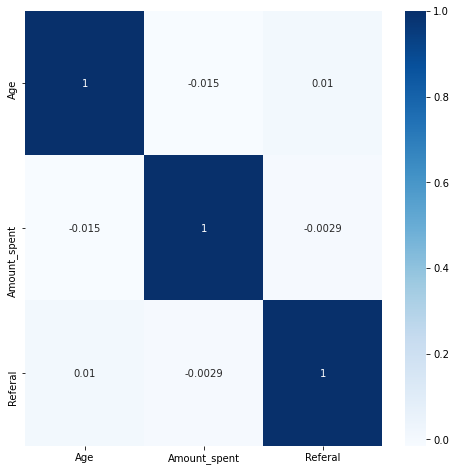

In [80]:
correlation_map = my_deep_copy_1[['Age', 'Amount_spent','Referal']].corr()
plt.figure(figsize=(8,8))
sns.heatmap(data=correlation_map,cmap='Blues', annot=True)

**********************************************

**:חיפשנו התפלגות בין המגדר לגילאים השונים**

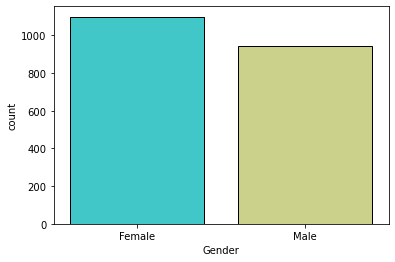

In [81]:
sns.countplot( x="Gender", data=my_deep_copy_1 , edgecolor = 'black', palette = "rainbow");


**ניתן להסיק מהמימצאים הראשונים כי לנשים יש נוכחות חזקה יותר מאשר לגברים**
*********************

**?השאלה הראשונה שעולה היא האם הביטוי "נשים בזבזניות יותר מאשר גברים" נכון**

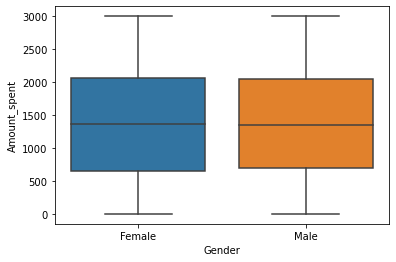

In [82]:
sns.boxplot(x='Gender', y='Amount_spent', data=my_deep_copy_1)
plt.show()

***המסקנה: היא שכמעט ואין שוני בין המגדר כמות הכסף שהמגדרים מבזבזים***

# :תובנה מספר 1 

***ניתן לראות כי יש יותר נשים מגברים באופן מפתיע. למה מפתיע?  השווינו את התפלגות ההוצאות וגילינו כי אין כמעט שום הבדל בין ההוצאות של גברים בקניות באינטרנט להוצאות של נשים. דבר זה מפתיע ביותר כי על פי הגרף ניתן לראות כי גברים עורכים יותר קניות באינטרנט ובשל כך גם מבזבזים יותר כסף באינטרנט מאשר נשים, דבר זה מתנגד לנורמה החברתית אשר ידוע בתור נשים קונות יותר ומוציאות יותר כסף ולכן מסקנה זאת היא מסקנה מפתיעה ומעניינת***

************************

**:חיפשנו אם יש השפעה על כמות הבזבוזים, אם נכנסת עם קישור או בלי קישור**

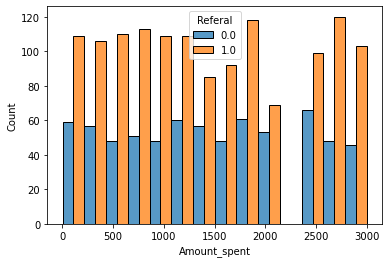

In [83]:
sns.histplot(data=my_deep_copy_1, x='Amount_spent', stat='count', hue='Referal', multiple = 'dodge');

# :תובנה  מספר 2


***ניתן לראות כי אנשים בארצות הברית משתמשים יותר בקישורים, מדבר זה ניתן להעסיק כי אנשים חולקים עם חבריהם קישורים של מוצרים שקנו ברשת. מסקנה זו היא מסקנה מעניינת מכיון שבישראל
המצב איננו זהה ואף הפוך לגמרי. נראה זאת בהמשך הקובץ בעזרת סקר שערכנו***

***

In [84]:
my_deep_copy["year"] = pd.DatetimeIndex(my_deep_copy["Transaction_date"]).year
my_deep_copy["month"] = pd.DatetimeIndex(my_deep_copy["Transaction_date"]).month
online_shopping_2020 = my_deep_copy.loc[my_deep_copy.year == 2020]
online_shopping_2019 = my_deep_copy.loc[my_deep_copy.year == 2019]
online_shopping_2021 = my_deep_copy.loc[my_deep_copy.year== 2021]

***

**:רצינו לבדוק מהי ההתפלגות בשנים 2019-2021 בחודשים ינואר ,פברואר ומרץ**

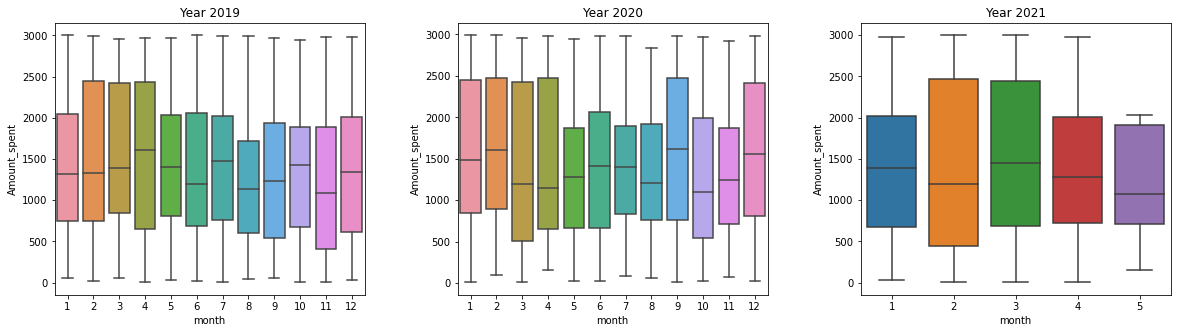

In [85]:
fig, axes = plt.subplots(figsize=(20, 5), ncols=3)
plt.subplots_adjust(wspace = 0.3)
year2019=sns.boxplot(x='month', y='Amount_spent', data=online_shopping_2019, ax = axes[0])
year2020=sns.boxplot(x='month', y='Amount_spent', data=online_shopping_2020, ax = axes[1])
year2021=sns.boxplot(x='month', y='Amount_spent', data=online_shopping_2021, ax = axes[2])


year2019.set_title("Year 2019");
year2020.set_title("Year 2020");
year2021.set_title("Year 2021");


************

<div>
<img src="https://raw.githubusercontent.com/RBTA123/first.r/main/2019-2022.JPG" width="650"/>
</div>

*************


************

<div>
<img src="https://raw.githubusercontent.com/RBTA123/first.r/main/online.JPG" width="1500"/>
</div>

*************


# :תובנה מספר 3 

***ניתן לראות כי ב 2020 יש זינוק ניכר בעליה בקניות בחודשים ינואר - אפריל. עלייה זאת מצופה מכיוון שבדיוק בחודשים אלה הקורונה הייתה בשיאה ואנשים העדיפו שלא לצאת מהבית ובשל כך קנו יותר דברים מהרשת.***

***

**עניין אותנו לדעת באיזה הכרטיס השתמשו רוב אנשים**

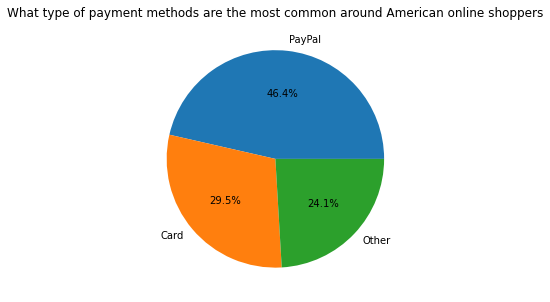

In [88]:
plt.figure(1, figsize=(5,5))
plt.title("What type of payment methods are the most common around American online shoppers")
my_deep_copy_1['Payment_method'].value_counts().plot.pie(autopct="%1.1f%%") 
plt.ylabel("")  
plt.show()

<div>
<img src="https://raw.githubusercontent.com/RBTA123/first.r/main/IMG-20220520-WA0023.jpg" width="500"/>
</div>

# :תובנה מספר 4 

***רוב האנשים מעדיפים לבצע קניות ברשת דרך פאייפאל זאת תוצאה שאנחנו מצפים לראות מכיוון שידוע שפאייפאל זאת דרך קנייה יותר בטוחה ברשת מאשר כרטיסי אשראי
ניתן לראות בתמונה למעלה 
השוואה של קנייה בכרטיס אשראי מול קנייה בעזרת פאייפאל***



***

In [90]:
url_shopping =  "https://raw.githubusercontent.com/RBTA123/first.r/main/Survey%2Bon%2BBuy%2BOnline.csv "
online_shop_israel = pd.read_csv(url_shopping)

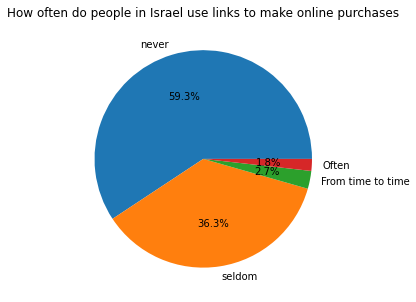

In [91]:
plt.figure(1, figsize=(5,5))
plt.title("How often do people in Israel use links to make online purchases")
online_shop_israel['If so, how often do you make a purchase that results from the link / advertisement?'].value_counts().plot.pie(autopct="%1.1f%%") 
plt.ylabel("")  
plt.show()

***ניתן לראות כי בניגוד לארצות הברית בישראל אנשים מעדיפים שלא להיכנס ללינקים ולקנות דרך לינקים שחולקים איתם***

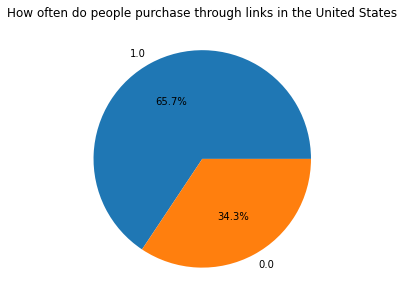

In [92]:
plt.figure(1, figsize=(5,5))
plt.title("How often do people purchase through links in the United States")
my_deep_copy_1['Referal'].value_counts().plot.pie(autopct="%1.1f%%") 
plt.ylabel("")  
plt.show()


# :תובנה מספר 5 

***ניתן לראות כי בישראל 
אנשים נוטים שלא לקנות מלינקים שנשלחו אליהם 
בעוד שבארצות הברית ניתן לראות בדיוק ההפך. רוב האנשים דווקא כן עושים את הקניות שלהם מלינקים שנשלחו אליהם
מה שמראה על השוני בין תרבויות הקנייה ברשת  של ישראלים מול אמריקאים*** 

***

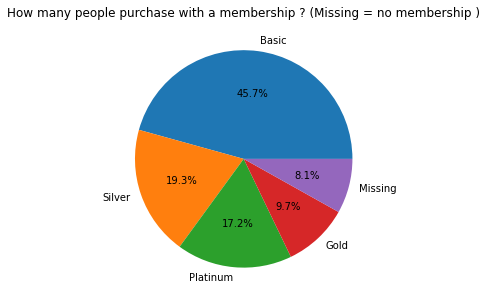

In [93]:
plt.figure(1, figsize=(5,5))
plt.title("How many people purchase with a membership ? (Missing = no membership )" )
my_deep_copy_1['Segment'].value_counts().plot.pie(autopct="%1.1f%%") 
plt.ylabel("")  
plt.show()



 ***ניתן לראות כי רוב האנשים העורכים קניות הם עורכים קניות עם מנוי כלשהו***

***

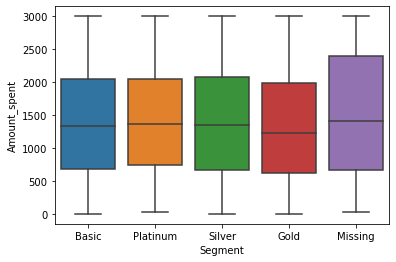

In [94]:
sns.boxplot(x='Segment', y='Amount_spent', data=my_deep_copy_1);

# :תובנה מספר 6 


***ניתן לראות באופן מפתיע כי אנשים בלי מנויים מבזבזים יותר כסף מאשר אנשים עם מנויים. דבר זה מפתיע מכיוון שאנחנו מצפים שאנשים שיש להם מנויים יקנו בתדירות גבוהה יותר ולכן אפשר לצפות מהם שיוציאו גם יותר כסף. אבל, על פי הגרף ניתן לראות כי המצב הוא בדיוק ההפך, מה  שמפתיע ומה שמביא אותנו למסקנה שאנשים שאין להם מנויים מבזבזים יותר כסף***

***

***

## אז מה המוצר האהוב  עליכם לקנייה ברשת? 